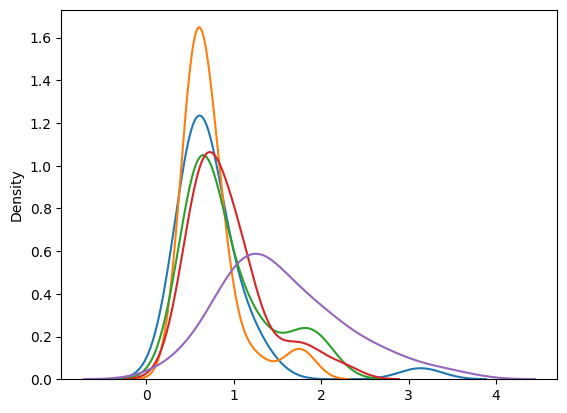

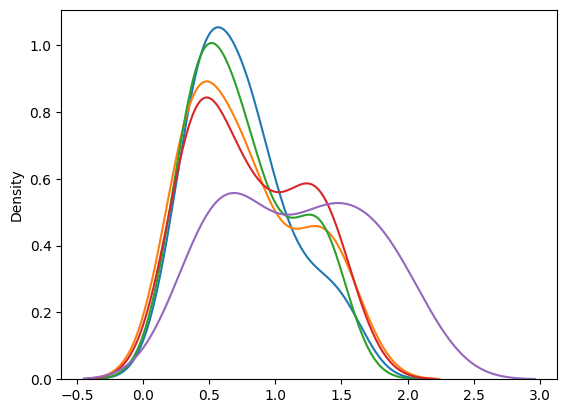

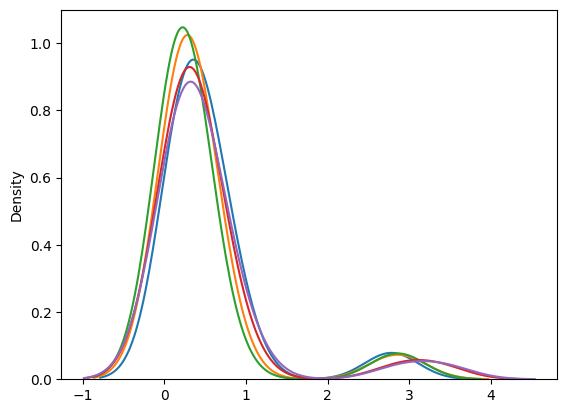

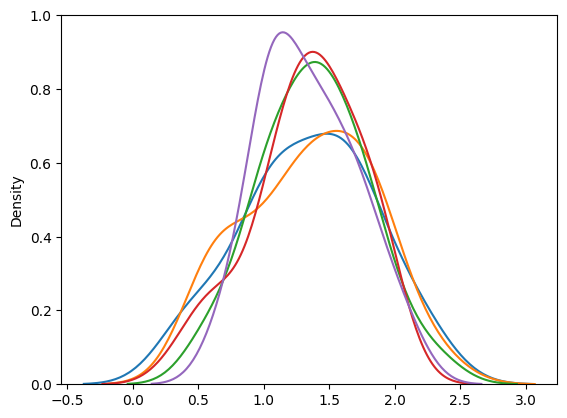

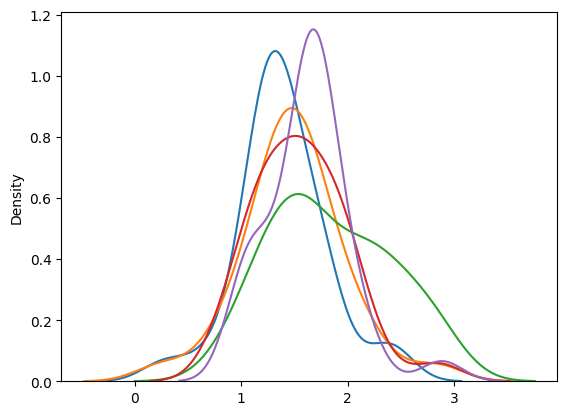

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df_power = pd.read_csv('../data/citylearn_challenge_2022_phase_1/net_minmax_preds.csv', index_col=0)

for i in range(5):
    build_num = i+1
    index = f'Net+1_{build_num}'
    df_power[f'Net+1_diff_{build_num}'] = df_power[index].diff()



def get_sep_data(df, index):
    sep_data = list()

    for i in range(5): # number of buildings
        sep_data.append(list())
        build_num = i+1
        for month in range(12): # number of months
            sep_data[i].append(list())
            for hour in range(24): # number of hours
                same_month = df_power['Month'] == month
                same_hour = df_power['Hour'] == hour
                sep_df = list(df_power.loc[same_month & same_hour, f'{index}{build_num}'])
                sep_data[i][month].append(sep_df)
    return sep_data

sep_data = get_sep_data(df_power, 'Net+1_')
sep_data_diff = get_sep_data(df_power, 'Net+1_diff_')

# plt.hist(sep_data[0], bins=20)
hour_start = 0
for j in range(5):
    fig, (ax1, ax2) = plt.subplots(1,2, figsize=(20,8))
    for i in range(hour_start, hour_start+5):
        sns.kdeplot(sep_data[j][0][i], ax=ax1)
        sns.kdeplot(sep_data_diff[j][0][i], ax=ax2)




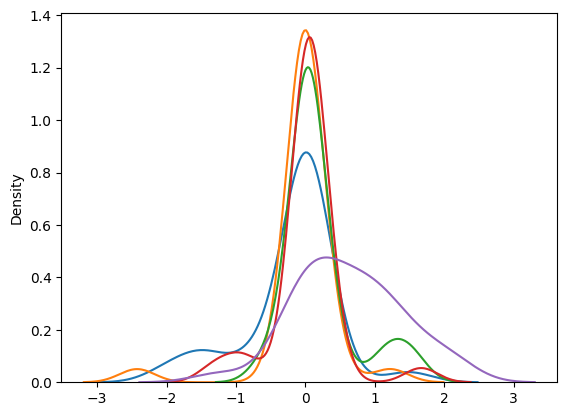

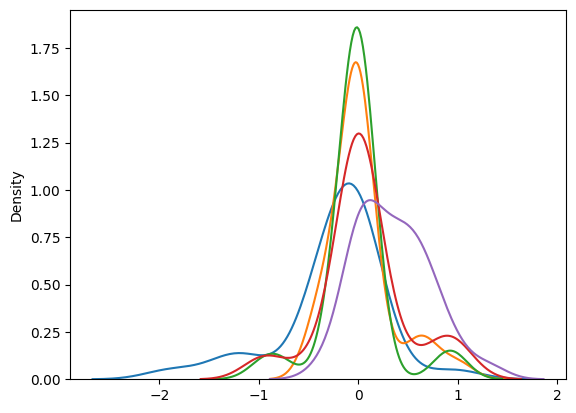

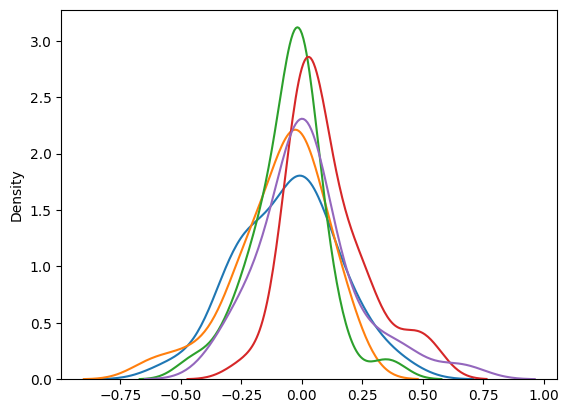

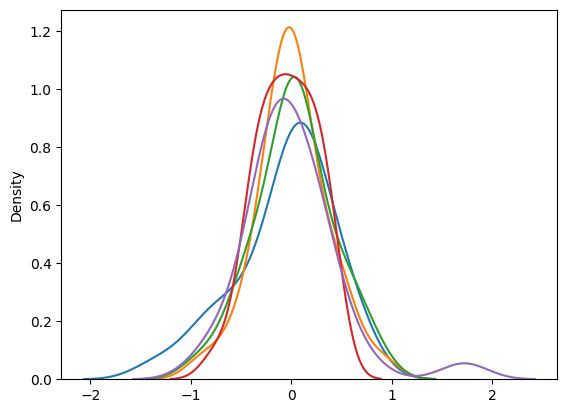

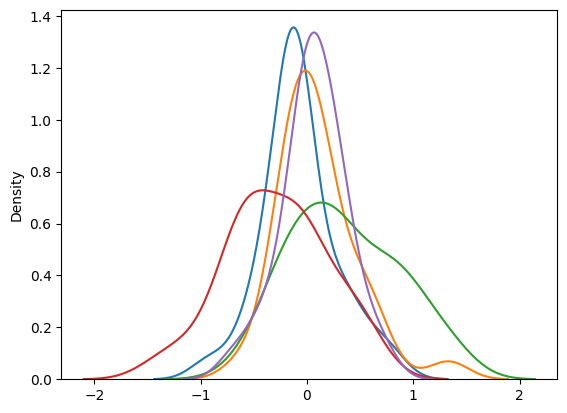

In [31]:
sep_data = get_sep_data(df_power, 'Net+1_diff_')

# plt.hist(sep_data[0], bins=20)
hour_start = 0
for j in range(5):
    plt.figure()
    for i in range(hour_start, hour_start+5):
        sns.kdeplot(sep_data[j][0][i])


